In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [86]:
test = pd.read_csv('../15_modified_data/train_data.csv')
test.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,date,pickup_community_name,dropoff_community_name,year,month,day,day_of_week,hour,weekend,nonzero_tip
0,2019-09-24 06:30:00,2019-09-24 06:45:00,802.0,6.183132,10.0,3,2.55,False,1,2019-09-24,LINCOLN PARK,NEAR WEST SIDE,2019,September,24,Tuesday,6,0,1
1,2019-07-30 11:45:00,2019-07-30 12:30:00,2349.0,18.248731,35.0,0,8.11,False,1,2019-07-30,OHARE,NEAR NORTH SIDE,2019,July,30,Tuesday,11,0,0
2,2018-11-17 01:15:00,2018-11-17 01:30:00,684.0,5.277118,10.0,0,2.50,False,1,2018-11-17,NEAR NORTH SIDE,NORTH CENTER,2018,November,17,Saturday,1,1,0
3,2019-12-09 12:00:00,2019-12-09 12:15:00,698.0,3.079843,7.5,1,2.55,False,1,2019-12-09,WEST TOWN,NEAR WEST SIDE,2019,December,9,Monday,12,0,1
4,2018-12-17 15:00:00,2018-12-17 15:00:00,812.0,2.996371,7.5,0,2.50,False,1,2018-12-17,SOUTH SHORE,GREATER GRAND CROSSING,2018,December,17,Monday,15,0,0


In [87]:
tip_count_0, tip_count_1 = test['nonzero_tip'].value_counts()
tip_0 = test[test['nonzero_tip'] == 0]
tip_1 = test[test['nonzero_tip'] == 1]
print('tip 0:', tip_0.shape)
print('tip 1:', tip_1.shape)

tip 0: (68654, 19)
tip 1: (15049, 19)


In [88]:
print('tip 1 %: {:.3f}'.format(tip_count_1 / (tip_count_1 + tip_count_0)))
print('tip 2 %: {:.3f}'.format(tip_count_0 / (tip_count_1 + tip_count_0)))

tip 1 %: 0.180
tip 2 %: 0.820


total class of 1 and 0: 
 0    15049
1    15049
Name: nonzero_tip, dtype: int64
TOTAL rows 30098


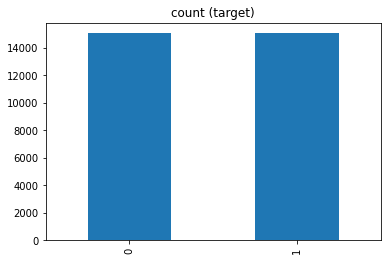

In [89]:
# Undersample
tip_0_under = tip_0.sample(tip_count_1)
test_under = pd.concat([tip_0_under, tip_1], axis=0)
print("total class of 1 and 0: \n", test_under['nonzero_tip'].value_counts())# plot the count after under-sampeling
test_under['nonzero_tip'].value_counts().plot(kind='bar', title='count (target)')
print('TOTAL rows {}'.format(len(test_under)))

In [90]:
y = test_under['nonzero_tip']
len(y)


30098

In [91]:
X = pd.get_dummies(test_under, columns = ['dropoff_community_name', 'pickup_community_name'])
X.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,date,...,pickup_community_name_WASHINGTON HEIGHTS,pickup_community_name_WASHINGTON PARK,pickup_community_name_WEST ELSDON,pickup_community_name_WEST ENGLEWOOD,pickup_community_name_WEST GARFIELD PARK,pickup_community_name_WEST LAWN,pickup_community_name_WEST PULLMAN,pickup_community_name_WEST RIDGE,pickup_community_name_WEST TOWN,pickup_community_name_WOODLAWN
51036,2019-07-08 13:30:00,2019-07-08 13:45:00,681.0,2.112103,7.5,0,2.55,False,1,2019-07-08,...,0,0,0,0,0,0,0,0,0,0
22736,2019-08-05 11:30:00,2019-08-05 11:45:00,993.0,3.644143,12.5,0,3.11,False,1,2019-08-05,...,0,0,0,0,0,0,0,0,0,0
19511,2018-12-12 18:15:00,2018-12-12 18:45:00,1166.0,4.840932,12.5,0,2.50,False,1,2018-12-12,...,0,0,0,0,0,0,0,0,0,0
42160,2019-04-12 23:30:00,2019-04-12 23:45:00,1315.0,11.484873,17.5,0,2.55,False,1,2019-04-12,...,0,0,0,0,0,0,0,0,0,0
70393,2019-06-29 19:15:00,2019-06-29 19:30:00,695.0,4.239179,12.5,0,2.55,False,1,2019-06-29,...,0,0,0,0,0,0,0,0,0,0


In [92]:
X.drop(['nonzero_tip', 'trip_start_timestamp', 'trip_end_timestamp', 'date' ], axis=1, inplace=True)


In [93]:
# X['nonzero_tip']

In [94]:
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
X['month_int'] = X['month'].map(month_map)

In [95]:
day_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
X['day_ofweek_int'] = X['day_of_week'].map(day_map)
X['day_ofweek_int'].value_counts()

6    5564
5    5062
4    4296
7    4129
3    3836
2    3761
1    3450
Name: day_ofweek_int, dtype: int64

In [96]:
X.drop(['day_of_week', 'month' ], axis=1, inplace=True)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [133]:
val = pd.read_csv('../15_modified_data/val_data.csv')
val.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,date,pickup_community_name,dropoff_community_name,year,month,day,day_of_week,hour,weekend,nonzero_tip
0,2018-11-18 07:00:00,2018-11-18 07:00:00,100.0,0.572958,2.5,0,2.50,False,1,2018-11-18,IRVING PARK,IRVING PARK,2018,November,18,Sunday,7,1,0
1,2020-01-22 09:30:00,2020-01-22 09:45:00,986.0,4.142381,10.0,0,4.83,False,1,2020-01-22,NEAR NORTH SIDE,LOOP,2020,January,22,Wednesday,9,0,0
2,2018-11-26 18:45:00,2018-11-26 19:00:00,584.0,1.830871,5.0,1,2.50,False,1,2018-11-26,LAKE VIEW,LINCOLN PARK,2018,November,26,Monday,18,0,1
3,2018-12-30 15:15:00,2018-12-30 15:30:00,819.0,4.976403,10.0,0,2.50,False,1,2018-12-30,SOUTH SHORE,FULLER PARK,2018,December,30,Sunday,15,1,0
4,2019-07-01 23:45:00,2019-07-02 00:00:00,1162.0,8.918748,15.0,2,2.55,False,1,2019-07-01,NEAR WEST SIDE,EDGEWATER,2019,July,1,Monday,23,0,1


In [134]:
val_y = val['nonzero_tip']


In [137]:
val.columns

Index(['trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'fare', 'tip', 'additional_charges',
       'shared_trip_authorized', 'trips_pooled', 'date',
       'pickup_community_name', 'dropoff_community_name', 'year', 'month',
       'day', 'day_of_week', 'hour', 'weekend', 'nonzero_tip'],
      dtype='object')

In [138]:
val_X = pd.get_dummies(val, columns = ['dropoff_community_name', 'pickup_community_name'])
val_X.head()
val_X.drop(['nonzero_tip', 'trip_start_timestamp', 'trip_end_timestamp', 'date' ], axis=1, inplace=True)
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
val_X['month_int'] = val_X['month'].map(month_map)
day_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
val_X['day_ofweek_int'] = val_X['day_of_week'].map(day_map)
val_X['day_ofweek_int'].value_counts()
val_X.drop(['day_of_week', 'month' ], axis=1, inplace=True)

In [159]:
valCol = []
setlist = set
Xcol = []
for i in val_X.columns:
    valCol.append(i)
    # setlist.append(i)
    
for i in X.columns:
    Xcol.append(i)

# print(valCol)
# main_list = list(set(valCol) - set(Xcol))
# main_list

In [160]:
for i in Xcol:
    if i not in valCol:
        print(i)

dropoff_community_name_RIVERDALE


In [161]:
X.drop(['dropoff_community_name_RIVERDALE'], axis = 1, inplace=True)

In [155]:
du = val_X.loc[:,~val_X.columns.duplicated()]
len(du.columns)

166

In [156]:
do = X.loc[:,~X.columns.duplicated()]
len(do.columns)

167

In [147]:
val_X.head()
len(val_X.columns)
len(X.columns)

167

In [162]:
log5 = LogisticRegression()
log5.fit(X, y)
ypred5 = log5.predict(val_X)
ypred5

/Users/michellevan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 1, ..., 1, 1, 0])

In [164]:
accuracy_score(ypred5, val_y)

0.9969055783223216

In [98]:
log = LogisticRegression()
log.fit(X_train, y_train)
ypred = log.predict(X_test)
ypred

/Users/michellevan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 0, ..., 0, 1, 0])

In [99]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [100]:
accuracy_score(ypred, y_test)

1.0

In [101]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2999
           1       1.00      1.00      1.00      3021

    accuracy                           1.00      6020
   macro avg       1.00      1.00      1.00      6020
weighted avg       1.00      1.00      1.00      6020



In [102]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
import collections
from imblearn.over_sampling import RandomOverSampler


In [103]:
test1 = pd.read_csv('../15_modified_data/train_data.csv')
test1.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,date,pickup_community_name,dropoff_community_name,year,month,day,day_of_week,hour,weekend,nonzero_tip
0,2019-09-24 06:30:00,2019-09-24 06:45:00,802.0,6.183132,10.0,3,2.55,False,1,2019-09-24,LINCOLN PARK,NEAR WEST SIDE,2019,September,24,Tuesday,6,0,1
1,2019-07-30 11:45:00,2019-07-30 12:30:00,2349.0,18.248731,35.0,0,8.11,False,1,2019-07-30,OHARE,NEAR NORTH SIDE,2019,July,30,Tuesday,11,0,0
2,2018-11-17 01:15:00,2018-11-17 01:30:00,684.0,5.277118,10.0,0,2.50,False,1,2018-11-17,NEAR NORTH SIDE,NORTH CENTER,2018,November,17,Saturday,1,1,0
3,2019-12-09 12:00:00,2019-12-09 12:15:00,698.0,3.079843,7.5,1,2.55,False,1,2019-12-09,WEST TOWN,NEAR WEST SIDE,2019,December,9,Monday,12,0,1
4,2018-12-17 15:00:00,2018-12-17 15:00:00,812.0,2.996371,7.5,0,2.50,False,1,2018-12-17,SOUTH SHORE,GREATER GRAND CROSSING,2018,December,17,Monday,15,0,0


In [104]:
y1 = test1['nonzero_tip']

In [105]:
X1 = test.drop(['trip_start_timestamp', 'trip_end_timestamp', 'date', 'nonzero_tip'], axis=1)
X1.columns

Index(['trip_seconds', 'trip_miles', 'fare', 'tip', 'additional_charges',
       'shared_trip_authorized', 'trips_pooled', 'pickup_community_name',
       'dropoff_community_name', 'year', 'month', 'day', 'day_of_week', 'hour',
       'weekend'],
      dtype='object')

In [106]:
X1 = pd.get_dummies(X1, columns = ['dropoff_community_name', 'pickup_community_name'])
X1.head()

,trip_seconds,trip_miles,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,year,month,day,...,pickup_community_name_WASHINGTON HEIGHTS,pickup_community_name_WASHINGTON PARK,pickup_community_name_WEST ELSDON,pickup_community_name_WEST ENGLEWOOD,pickup_community_name_WEST GARFIELD PARK,pickup_community_name_WEST LAWN,pickup_community_name_WEST PULLMAN,pickup_community_name_WEST RIDGE,pickup_community_name_WEST TOWN,pickup_community_name_WOODLAWN
0,802.0,6.183132,10.0,3,2.55,False,1,2019,September,24,...,0,0,0,0,0,0,0,0,0,0
1,2349.0,18.248731,35.0,0,8.11,False,1,2019,July,30,...,0,0,0,0,0,0,0,0,0,0
2,684.0,5.277118,10.0,0,2.50,False,1,2018,November,17,...,0,0,0,0,0,0,0,0,0,0
3,698.0,3.079843,7.5,1,2.55,False,1,2019,December,9,...,0,0,0,0,0,0,0,0,1,0
4,812.0,2.996371,7.5,0,2.50,False,1,2018,December,17,...,0,0,0,0,0,0,0,0,0,0


In [107]:
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
X1['month_int'] = X1['month'].map(month_map)

In [108]:
day_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
X1['day_ofweek_int'] = X1['day_of_week'].map(day_map)
X1['day_ofweek_int'].value_counts()


6    15304
5    14320
4    11782
7    11456
3    10723
2    10401
1     9717
Name: day_ofweek_int, dtype: int64

In [109]:
X1.drop(['day_of_week', 'month' ], axis=1, inplace=True)


In [110]:
rus = RandomUnderSampler(random_state=42, replacement=True)


In [111]:
x_rus, y_rus = rus.fit_resample(X1, y1)


In [112]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_rus, y_rus, test_size=0.2, random_state=0)

In [113]:
log1 = LogisticRegression()
log1.fit(X_train1, y_train1)
ypred1 = log1.predict(X_test1)
ypred1

/Users/michellevan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 0, ..., 0, 1, 0])

In [114]:
accuracy_score(ypred1, y_test1)

1.0

In [115]:
print(classification_report(y_test1, ypred1))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2999
           1       1.00      1.00      1.00      3021

    accuracy                           1.00      6020
   macro avg       1.00      1.00      1.00      6020
weighted avg       1.00      1.00      1.00      6020



In [116]:
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X1, y1)

In [117]:
x_ros.head()

,trip_seconds,trip_miles,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,year,day,hour,...,pickup_community_name_WEST ELSDON,pickup_community_name_WEST ENGLEWOOD,pickup_community_name_WEST GARFIELD PARK,pickup_community_name_WEST LAWN,pickup_community_name_WEST PULLMAN,pickup_community_name_WEST RIDGE,pickup_community_name_WEST TOWN,pickup_community_name_WOODLAWN,month_int,day_ofweek_int
0,802.0,6.183132,10.0,3,2.55,False,1,2019,24,6,...,0,0,0,0,0,0,0,0,9,2
1,2349.0,18.248731,35.0,0,8.11,False,1,2019,30,11,...,0,0,0,0,0,0,0,0,7,2
2,684.0,5.277118,10.0,0,2.50,False,1,2018,17,1,...,0,0,0,0,0,0,0,0,11,6
3,698.0,3.079843,7.5,1,2.55,False,1,2019,9,12,...,0,0,0,0,0,0,1,0,12,1
4,812.0,2.996371,7.5,0,2.50,False,1,2018,17,15,...,0,0,0,0,0,0,0,0,12,1


In [118]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_ros, y_ros, test_size=0.2, random_state=0)

In [119]:
log2 = LogisticRegression()
log2.fit(X_train2, y_train2)
ypred2 = log2.predict(X_test2)
ypred2

/Users/michellevan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 1, ..., 0, 1, 0])

In [120]:
accuracy_score(ypred2, y_test2)

0.9947928046027238

In [121]:
print(classification_report(y_test2, ypred2))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13622
           1       0.99      0.99      0.99     13840

    accuracy                           0.99     27462
   macro avg       0.99      0.99      0.99     27462
weighted avg       0.99      0.99      0.99     27462



In [122]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X1, y1)

In [123]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(x_smote, y_smote, test_size=0.2, random_state=0)

In [124]:
log3 = LogisticRegression()
log3.fit(X_train3, y_train3)
ypred3 = log3.predict(X_test3)
ypred3

/Users/michellevan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 1, ..., 0, 1, 0])

In [125]:
accuracy_score(ypred3, y_test3)

0.992134585973345

In [126]:
print(classification_report(y_test3, ypred3))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13622
           1       0.99      0.99      0.99     13840

    accuracy                           0.99     27462
   macro avg       0.99      0.99      0.99     27462
weighted avg       0.99      0.99      0.99     27462



In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm


In [128]:
rf = RandomForestClassifier(n_estimators=20, random_state=0)

In [129]:
rf.fit(X_train3, y_train3)

RandomForestClassifier(n_estimators=20, random_state=0)

In [130]:
ypred_rf = log.predict(X_test3)
ypred_rf

array([0, 0, 1, ..., 0, 1, 0])

In [131]:
accuracy_score(ypred_rf, y_test3)

1.0

In [132]:
print(classification_report(y_test3, ypred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13622
           1       1.00      1.00      1.00     13840

    accuracy                           1.00     27462
   macro avg       1.00      1.00      1.00     27462
weighted avg       1.00      1.00      1.00     27462

